In [1]:
# My Google Drive Mount하기!
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 1. 어떤 데이터를 사용할 것인가

* 2007년부터 2017년까지 **데이터 사이언스**와 관련된 3,920개 논문의 title 및 abstract

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://github.com/euphoris/datasets/raw/master/neurips.zip')

print('df의 shape:', df.shape)

df의 shape: (3920, 3)


In [3]:
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [4]:
df.tail()

,year,title,abstract
3915,2017,"On Separability of Loss Functions, and Revisit...",We revisit the classical analysis of generativ...
3916,2017,Maxing and Ranking with Few Assumptions,PAC maximum ...
3917,2017,On clustering network-valued data,"Community detection, which focuses on clusteri..."
3918,2017,A General Framework for Robust Interactive Lea...,We propose a general framework for interactive...
3919,2017,Multi-view Matrix Factorization for Linear Dyn...,We consider maximum likelihood estimation of l...


# 2. TDM 형성하기

TF-IDF를 고려한 TDM을 사용하도록 한다.
* TF-IDF의 사용효과
    * Document 마다 거의 매번 언급되는 **고빈도** Term의 가중치를 상대적으로 낮출 수 있다.
        * 매번 발생하는 Term의 경우, 각 Document 간의 차이에 대한 설명력이 약하기 때문이다.
    * 특정 Document에만 언급되는 **저빈도** Term의 가중치를 상대적으로 높일 수 있다.
        * 가끔 발생하는 Term의 경우, 각 Document 간의 차이에 대한 설명력이 강하기 때문이다.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# Term의 최대 수: 2,000
# Filler Words (Stop Words): English 기준으로 Term 후보에서 제외하도록 한다.

cv = TfidfVectorizer(
    max_features=2000,
    stop_words='english'
)

tdm = cv.fit_transform(
    df['abstract']
)

print('Abstract 기존 데이터 수:', df['abstract'].shape)
print('새롭게 정의된 TDM의 Shape:', tdm.shape)

Abstract 기존 데이터 수: (3920,)
새롭게 정의된 TDM의 Shape: (3920, 2000)


In [7]:
# 2,000개 Terms를 List화한다.
term_list = list(cv.get_feature_names_out())

print('Terms 수:', len(term_list))
print('Index 100~109 Terms 확인하기:', term_list[100:110])

Terms 수: 2000
Index 100~109 Terms 확인하기: ['approximating', 'approximation', 'approximations', 'arbitrarily', 'arbitrary', 'architecture', 'architectures', 'area', 'areas', 'argue']


# 3. LSA (Latent Semantic Analysis) 방법

LSA 중, Truncated SVD (Singular Vector Decomposition)을 사용한다.
* 기존의 TDM의 차원을 축소하여 주제 별로 분포를 확인할 수 있게 된다.
* 기존 TDM의 Features 차원: 2,000개의 Terms
* 새롭게 정의된 Features 차원: N개의 Topics (N < 2,000)

In [8]:
from sklearn.decomposition import TruncatedSVD

# Topic의 개수: 100개로 설정해보자. (n_components)

svd = TruncatedSVD(
    n_components=100,
    random_state=1234
)

svd.fit(tdm)

print('Topic 개수 X Term 개수:', svd.components_.shape)

Topic 개수 X Term 개수: (100, 2000)


In [10]:
print('Row (Topics):', svd.components_.shape[0])
print('Column (Terms):', svd.components_.shape[1])

pd.DataFrame(svd.components_).head()

# 0th Term의 (+)1개 == 0th Topic의 (+)0.004839 효과 발생
# 0th Term의 (+)1개 == 1th Topic의 (-)0.005540 효과 발생

Row (Topics): 100
Column (Terms): 2000


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.004839,0.012438,0.004755,0.004786,0.006525,0.016033,0.017417,0.026732,0.004043,0.005540,...,0.006644,0.004346,0.013110,0.040920,0.015304,0.009035,0.010196,0.004915,0.016202,0.011610
1,-0.005540,-0.018600,-0.006815,-0.003367,-0.015666,-0.051126,-0.023962,-0.021025,0.002732,-0.006838,...,0.005801,-0.001325,0.005169,-0.009279,0.032849,0.000856,-0.004541,0.000743,0.001496,0.008398
2,-0.003316,-0.022860,-0.005377,-0.002585,-0.010474,-0.046212,-0.012306,-0.015086,-0.002460,-0.009924,...,-0.003161,-0.000646,-0.005874,0.011390,-0.011039,-0.002924,-0.007327,-0.001035,0.001358,-0.007861
3,0.003849,0.004434,-0.001343,0.001452,0.005706,0.018870,-0.001300,-0.000927,-0.001094,-0.002462,...,0.000173,-0.003661,0.002012,0.002605,-0.025794,0.000863,0.002291,-0.000237,0.008160,-0.001361
4,0.004466,0.014987,0.004349,0.004327,-0.007978,-0.022689,-0.009255,0.006299,-0.004326,-0.002443,...,-0.001316,-0.004108,-0.005925,-0.022785,-0.026169,0.002471,0.004331,0.006387,0.010747,-0.001130


# 4. 주제의 개수(100개)가 적절한 크기인지 검토하기

* 임의로 100개의 주제로 차원을 축소했는데, 가장 합리적인 축소 크기를 결정해보도록 한다.

In [17]:
# 기존의 TDM을 무작위로 resampling하여 Term과 Document 사이의 연관성이 사라진 새로운 TDM2를 만들어보자.

row_cnt, col_cnt = tdm.shape

def ResampleRows(table):
    return np.random.choice(
        table,
        size=table.shape[0]
    )

np.random.seed(1234)

tdm2 = np.apply_along_axis(
    ResampleRows,
    axis=0,
    arr=tdm.A
)

svd2 = TruncatedSVD(
    n_components=100,
    random_state=1234
)

svd2.fit(tdm2)

TruncatedSVD(n_components=100, random_state=1234)

**singular values_**: 100개의 각 Topic이 지니는 중요성을 의미함
* 중요성 ↑: TDM 내에서 해당 Topic과 연관된 Term들의 상호연결성이 높음 (Topic의 분류력 뚜렷)
* 중요성 ↓: TDM 내에서 해당 Topic과 연관된 Term들의 상호연결성이 낮음 (Topic의 분류력 희미)

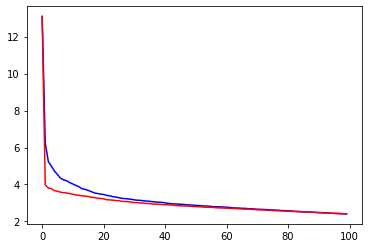

''

In [18]:
plt.plot(svd.singular_values_, color='blue') # 기존 TDM의 Topics 중요성
plt.plot(svd2.singular_values_, color='red') # 새로운 TDM2의 Topics 중요성
plt.show()
;

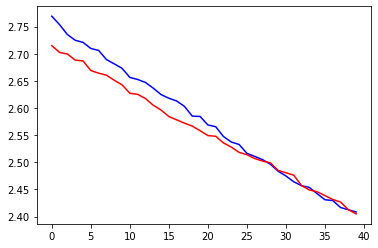

''

In [19]:
# 오른쪽 tail 부분을 자세히 살펴보자.

plt.plot(svd.singular_values_[60:], color='blue')
plt.plot(svd2.singular_values_[60:], color='red')
plt.show()
;

* Topics의 중요도에 따라 내림차순으로 정렬되어 있다.
* 기존의 TDM의 경우, 각 Topics의 중요도가 일반적으로 더 강하다.
* 새로운 TDM2의 경우, 각 TOpics의 중요도가 일반적으로 더 약하다.

* **"TDM2의 Topic 중요도 >= TDM의 Topic 중요도"**로 반전되는 Topic의 Index를 찾아야 한다.
    * 랜덤하게 Resampled된 TDM2의 Topic보다 낮은 중요도를 가지게 될 경우, 해당 Topic까지 고려하는 것이 무의미하기 때문이다.

In [24]:
# "TDM2의 Topic 중요도 >= TDM의 Topic 중요도"로 반전된 최초의 Topic Index 구하기

topic_cnt = np.argwhere(
    svd2.singular_values_ >= svd.singular_values_
)[0][0]
topic_cnt

88

* 88차원으로 다시 Truncated SVD 재생성한다.

In [25]:
# Topic의 개수: topic_cnt(88)개로 설정해보자. (n_components)

svd = TruncatedSVD(
    n_components=topic_cnt,
    random_state=1234
)

svd.fit(tdm)

print('Topic 개수 X Term 개수:', svd.components_.shape)

Topic 개수 X Term 개수: (88, 2000)


In [26]:
print('Row (Topics):', svd.components_.shape[0])
print('Column (Terms):', svd.components_.shape[1])

pd.DataFrame(svd.components_).head()

# 0th Term의 (+)1개 == 0th Topic의 (+)0.004839 효과 발생
# 0th Term의 (+)1개 == 1th Topic의 (-)0.005540 효과 발생

Row (Topics): 88
Column (Terms): 2000


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.004839,0.012438,0.004755,0.004786,0.006525,0.016033,0.017417,0.026732,0.004043,0.005540,...,0.006644,0.004346,0.013110,0.040920,0.015304,0.009035,0.010196,0.004915,0.016202,0.011610
1,-0.005540,-0.018600,-0.006815,-0.003367,-0.015665,-0.051123,-0.023962,-0.021025,0.002732,-0.006838,...,0.005802,-0.001325,0.005169,-0.009276,0.032849,0.000855,-0.004541,0.000743,0.001496,0.008398
2,-0.003316,-0.022861,-0.005378,-0.002586,-0.010475,-0.046218,-0.012308,-0.015085,-0.002459,-0.009923,...,-0.003168,-0.000648,-0.005873,0.011403,-0.011040,-0.002923,-0.007330,-0.001032,0.001354,-0.007862
3,0.003849,0.004428,-0.001342,0.001451,0.005717,0.018892,-0.001291,-0.000927,-0.001097,-0.002465,...,0.000177,-0.003660,0.002009,0.002629,-0.025825,0.000866,0.002295,-0.000238,0.008161,-0.001365
4,0.004465,0.014990,0.004348,0.004329,-0.007989,-0.022714,-0.009240,0.006309,-0.004320,-0.002444,...,-0.001320,-0.004111,-0.005928,-0.022836,-0.026186,0.002465,0.004331,0.006395,0.010748,-0.001142


# 5. **"Deep"** term에 대한 주제 분석

In [27]:
deep_term_idx = term_list.index('deep')

print('Term List 내에서 "Deep"의 Index:', deep_term_idx)

Term List 내에서 "Deep"의 Index: 450


In [29]:
# "Deep"이라는 term과 88개 Topics 사이의 관계 살펴보기

deep_term_df = pd.DataFrame(
    svd.components_[:, deep_term_idx], # 1st dim: topics / 2nd dim: terms
    columns=['Deep']
)
deep_term_df

,Deep
0,0.056432
1,-0.130005
2,-0.161916
3,-0.005517
4,0.145355
...,...
83,0.061741
84,-0.032664
85,-0.096448
86,0.074242


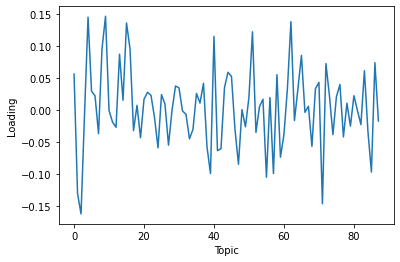

''

In [30]:
import matplotlib.pyplot as plt 

plt.plot(deep_term_df)

plt.xlabel('Topic')
plt.ylabel('Loading')

plt.show()
;

* 88개 Topics 중 **"Deep"**과 가장 관련성이 높은 Topic 확인하기

In [32]:
deep_besttopic_idx = svd.components_[:, deep_term_idx].argmax()

print('Deep과 가장 관련성이 높은 Topic의 Index:', deep_besttopic_idx)

Deep과 가장 관련성이 높은 Topic의 Index: 9


* 그렇다면, **"Deep"**과 가장 관련성이 높은 Topic에 대해 분석해보자.
    * 해당 Topic과 관련성이 가장 높은 Terms는 **"Deep"** 외에 또 어떤 Terms가 존재하는가?

In [34]:
deep_besttopic_df = pd.DataFrame({
    'term': term_list,
    'loading': svd.components_[deep_besttopic_idx, :]
})

deep_besttopic_df = deep_besttopic_df.sort_values('loading', ascending=False).reset_index(drop=True)
deep_besttopic_df.head(10)

,term,loading
0,matrix,0.309619
1,learning,0.242742
2,inference,0.182892
3,rank,0.179983
4,networks,0.159755
5,deep,0.146841
6,kernel,0.115580
7,training,0.106223
8,variational,0.100505
9,low,0.097779


# 6. 각 연도별로 Best Topic의 빈도 추이 확인해보기
* **"Deep"**과 관련된 Topic의 빈도 추이

In [38]:
# "Document X Topic"의 Matrix 확인하기
doctopic_matrix = svd.transform(tdm)

print('Document 수:', doctopic_matrix.shape[0])
print('Topic 수:', doctopic_matrix.shape[1])

Document 수: 3920
Topic 수: 88


In [41]:
docbesttopic_arr = doctopic_matrix[:, deep_besttopic_idx]

print('Document 수:', len(docbesttopic_arr))
docbesttopic_arr

Document 수: 3920


array([ 0.00628412,  0.06739708,  0.04593149, ..., -0.02654631,
        0.02227906, -0.00522747])

In [42]:
yearbesttopic_df = pd.DataFrame({
    'year': df['year'],
    'deep topic': docbesttopic_arr
})
yearbesttopic_df.head()

,year,deep topic
0,2007,0.006284
1,2007,0.067397
2,2007,0.045931
3,2007,-0.060250
4,2007,-0.101326


In [44]:
# Year 별로 Grouping하여 Aggregate해본다.

yearlybesttopic_df = yearbesttopic_df.groupby('year').agg('mean')
yearlybesttopic_df

,deep topic
year,
2007,-0.013187
2008,-0.015015
2009,-0.014669
2010,-0.012361
2011,-0.014398
2012,-0.006372
2013,-0.002479
2014,-0.000081
2015,0.007192


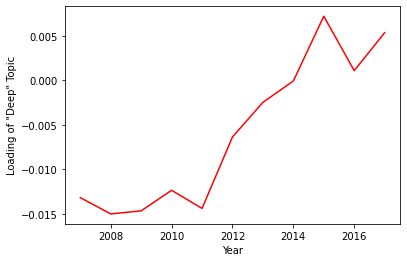

''

In [47]:
plt.plot(yearlybesttopic_df, color='red')

plt.xlabel('Year')
plt.ylabel('Loading of "Deep" Topic')

plt.show()
;

# 결론
* 2007년부터 2017년까지 "Deep"과 관련된 Topic의 빈도가 급격하게 상승하는 추세임을 알 수 있다!